### Notebook Training dan Konversi Model SeMAI Object Detection V2.0.0.0
#### Maintainer : BW, NAF, HAM
---
### Source : 
* [TensorFlow](https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/training.html#preparing-the-workspace)
* [centernet on device](https://github.com/tensorflow/models/blob/master/research/object_detection/colab_tutorials/centernet_on_device.ipynb)

### Description : 
* Object Detection model based on Python programming language
* Using Google Colaboratory platform to simplify implementation and training
* Final output : TFLite model (final target is implementation on android system)
* Object target : bonggol and berondolan (palm tree)
* Object Detection API Used : CenterNet_MobileNetV2 and SSDMobileNetV2 from [TF model detection zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md)

### Target (Trello) : 
- [x] Research Model dan Colab Notebook (Result: CenterNet TFLite Converter)
- [x] Konversi hasil checkpoint training menuju ke TFLite (Centernet TFLite Converter example)  
- [x] Adaptasi dataset dari Roboflow untuk dimasukkan ke model training (Custom Model Training dengan CenterNet MobileNetV2, dengan format dataset VOC)
- [x] Explore kapabilitas config training untuk pembuatan model (dapat diakses di file setting fine tuning `pipeline.config`)
- [x] Pembuatan Model, Training, Evaluating (output berupa `model.tflite`, `labelmap.txx` dan `saved_model`)
- [x] Pembuatan integrasi notebook training di colab (sebelumnya masih terpisah, notebook train dan konversi)
- [ ] Release eksperimen 1
- [ ] Pembuatan notebook versi offline (Jupyter Notebook) apabila dibutuhkan

### How to Use : 
* Repo berbasis pada platform Google Colaboratory 
* instruksi penggunaan ada pada platform colab ini


# Setting Storage

* hubungkan colab dengan google drive (disarankan, agar tidak mengulang-ulang proses kloning repo struktur ataupun tensorFlow untuk modifikasi model)
* kloning repo untuk struktur sistem (disarankan, agar hemat waktu dalam membuat struktur folder dan konten)
* program masih di-comment, uncomment kode sesuai dengan kebutuhan
* notebook ini dapat disimpan di Drive, di folder yang diinginkan (agar tersimpan dan dapat diubah2 nantinya), dalam hal ini notebook disimpan dalam folder SeMAI

In [ ]:
# !! Uncomment sesuai dengan kebutuhan !!
# perlu diikuti apabila masih pertama kali setting di Drive, apabila sudah pernah, ambil langkah2 yang perlu

# 1. Hubungkan storage google drive 

# from google.colab import drive
# drive.mount('/content/drive')

# 2. Buat folder khusus (agar tidak tercampur dengan folder lain), di kasus ini dibuat folder dengan nama Semai,
# kemudian, masuk ke dalam folder tersebut
# %cd /content/drive/MyDrive/SEMAI

# 3. kloning struktur folder yang dibutuhkan, 
# NOTES : apabila sudah pernah kloning sebelumnya, lewati langkah ini
# NOTES : repo masih bersifat private, butuh untuk memasukkan username dan password (pastikan terdaftar sebagai kolaborator)
# !apt install subversion
# !svn checkout https://github.com/ardx160/SeMAI-AI/trunk/Development/Sawit_Inspection_1.0.0.0

# 4. masuk ke dalam folder struktur
# %cd Bonggol_Detection_2.0.0.0/SeMAI_V2

# 5. kloning repo models dari tensorflow
# NOTES : apabila sudah pernah kloning sebelumnya, lewati langkah ini !
# NOTES : pastikan sudah masuk ke dalam folder SeMAI_V2
# !git clone https://github.com/tensorflow/models 

# 6. kloning model zoo (CenterNet dan SSDMobileNet)
# NOTES : apabila sudah pernah kloning sebelumnya, lewati langkah ini!

# %cd workspace/training_first/
# NOTES : pastikan sudah masuk ke dalam folder > workspace/training_first

# buat folder struktur (entah kenapa di github belum muncul)
# NOTES : apabila sudah pernah dibuat sebelumnya, lewati langkah ini!
# %mkdir annotations images models pre-trained-models

# %cd models/
# NOTES : pastikan sudah masuk ke dalam folder models/
# NOTES : yang sudah proven adalah model CenterNet MobileNetV2, untuk SSDMobileNet masih WIP
# NOTES : apabila sudah pernah dibuat sebelumnya, lewati langkah ini!
# !wget http://download.tensorflow.org/models/object_detection/tf2/20210210/centernet_mobilenetv2fpn_512x512_coco17_od.tar.gz
# !tar -xf centernet_mobilenetv2fpn_512x512_coco17_od.tar.gz
# !rm centernet_mobilenetv2fpn_512x512_coco17_od.tar.gz

# !wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
# !tar -xf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
# !rm ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

/content/drive/MyDrive/SEMAI/Bonggol_Detection_2.0.0.0/SeMAI_V2


# Model Training

## Dataset Preparation
* apabila setting storage sudah selesai, kembali ke folder utama untuk persiapan dataset.
* pastikan dataset dipisahkan dalam 2 kategori, yaitu dataset train dan test
* dataset dipastikan dalam format VOC

In [ ]:
# 1. kembali ke folder utama, agar mudah tracking, dan tahapan bisa disamakan
# %cd /content/drive/MyDrive/SEMAI/Bonggol_Detection_2.0.0.0/SeMAI_V2

# 2. masuk ke dalam folder images, untuk menempatkan file dataset yang sudah dalam format VOC
# NOTES : untuk sementara, sebagai contoh digunakan dataset bonggol v1 (roboflow)

# %cd workspace/training_first/images
# NOTES : pastikan sudah masuk ke dalam folder images

# download dataset yang sudah di anotasi
# NOTES : apabila ingin mengganti dataset, dapat dengan membuat workspace baru (traning_second, dsb) atau menghapus folder train, test existing
# NOTES : apabila sudah pernah clone dan ingin dengan dataset sama namun pipeline/epoch berbeda, lewati langkah ini
# !curl -L "https://app.roboflow.com/ds/Y7x4Pmra9i?key=moFawpbquZ" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

# 3. buat label_map.txt
# NOTES : contoh labelmap ada di SeMAI_V2/workspace/training_first/label_map_example_bonggol.pbtxt
# NOTES : apabila ingin training bonggol (1 label) cukup copy file example ke folder annotations, kemudian rename ke
#         label_map.pbtxt
# NOTES : bisa manual, atau dengan kode dibawah. apabila sudah dilakukan, lewati langkah ini
# %cp ../label_map_example_bonggol.pbtxt ../annotations/label_map.pbtxt

## Install package 
* Install object detection API
* Generate tfrecord file

In [ ]:
# 1. Install Object Detection API
# NOTES : masuk ke dalam folder utama > Bonggol_Detection_2.0.0.0/SeMAI_V2
# %cd /content/drive/MyDrive/SEMAI/Bonggol_Detection_2.0.0.0/SeMAI_V2

# NOTES : Perlu dijalankan setiap kali mau ulang training/membuat TFRecord, karena harus menginstall API terlebih dahulu
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

# 2. buat file tfrecord
# NOTES : masuk ke dalam folder Bonggol_Detection_2.0.0.0/SeMAI_V2/scripts/preprocessing
# %cd /content/drive/MyDrive/SEMAI/Bonggol_Detection_2.0.0.0/SeMAI_V2/scripts/preprocessing

# sekali running kalau di drive !!
# script generate_tfrecord.py perlu modifikasi, namun apabila sudah kloning struktur dari repo, tidak perlu diubah

# Create train data:
# NOTES : cek terlebih dahulu alamat folder, gunakan fitur salin jalur di colab, agar alamatnya lengkap
#         cukup dijalankan sekali
# %%bash
# python generate_tfrecord.py \
# -x /content/drive/MyDrive/SEMAI/Bonggol_Detection_2.0.0.0/SeMAI_V2/workspace/training_first/images/train \
# -l /content/drive/MyDrive/SEMAI/Bonggol_Detection_2.0.0.0/SeMAI_V2/workspace/training_first/annotations/label_map.pbtxt \
# -o /content/drive/MyDrive/SEMAI/Bonggol_Detection_2.0.0.0/SeMAI_V2/workspace/training_first/annotations/train.record

# # Create test data:
# python generate_tfrecord.py \
# -x /content/drive/MyDrive/SEMAI/Bonggol_Detection_2.0.0.0/SeMAI_V2/workspace/training_first/images/test \
# -l /content/drive/MyDrive/SEMAI/Bonggol_Detection_2.0.0.0/SeMAI_V2/workspace/training_first/annotations/label_map.pbtxt \
# -o /content/drive/MyDrive/SEMAI/Bonggol_Detection_2.0.0.0/SeMAI_V2/workspace/training_first/annotations/test.record


Processing /content/drive/My Drive/SEMAI/Bonggol_Detection_2.0.0.0/SeMAI_V2/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1650058 sha256=322550e83bf96fd2e9e8b979550e034c163f6182c32a0e4b92e29ce2268e1c41
  Stored in directory: /tmp/pip-ephem-wheel-cache-n7033yzo/wheels/c7/5b/3b/1ea08c3ddccadec773455617c4182efa0f2da53906623a8b37
  Created wheel for avro-python3: filename=avro_python3-1.10.2-cp37-none-any.whl size=44011 sha256=d7247c6d5b94ff690b91a83c22b51fe1015917a89d7fdfdcbbfab26bcafb8ee1
  Stored in directory: /root/.cache/pip/wheels/ee/ee/18/c466221ca6900e3efce2f4ea9c329288808679aecdcb2838d3
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491058 sha256=365f3d26f9c9f1e9ce5f77fe28e6f703fdf82c0138a4fd545482f8ade47f13af
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
  Created wheel for dill: filename=dill-0.3.1.1-cp37-none-any.whl size=78532 sha

ERROR: tensorflow 2.5.0 has requirement grpcio~=1.34.0, but you'll have grpcio 1.32.0 which is incompatible.
ERROR: multiprocess 0.70.11.1 has requirement dill>=0.3.3, but you'll have dill 0.3.1.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: apache-beam 2.29.0 has requirement avro-python3!=1.9.2,<1.10.0,>=1.8.1, but you'll have avro-python3 1.10.2 which is incompatible.


## Proses Training
* perlu untuk mengubah file pipeline.config
* mengubah nama folder checkpoint
* untuk saat ini proven di model CenterNet_MobileNetV2, untuk SSD_MobileNet masih WIP

In [ ]:
# Run Training 
# Notes : check file-file ini terlebih dahulu
# 1. cek setelan pipeline.config
# 2. remove keypoint dan permutation
### 2 poin diatas dapat dilihat pada contoh pipeline.config yang ada di 
#   Bonggol_Detection_2.0.0.0/SeMAI_V2/workspace/training_first/pipeline_centerNet_example.config
#   untuk mengurangi kerepotan, dapat copas/replace konten pipeline.config yang ada di CenterNet
#   cara : copas isi dari /SeMAI_V2/workspace/training_first/pipeline_centerNet_example.config
#          replace ke dalam isi SeMAI_V2/workspace/training_first/models/centernet_mobilenetv2_fpn_od/pipeline.config
#          jangan lupa ubah alamat folder di dalamnya, bagian train_input_reader dan eval_input_reader
#          sementara batch size nya di 8.. kalo mau cadas dikit, monggo dinaikkan
#   untuk sementara trust me it works wkwk

# 3. ubah folder/directory checkpoint menjadi checkpoint0 (di SeMAI_V2/workspace/training_first/models/centernet_mobilenetv2_fpn_od/checkpoint)
#    ubah nama directory nyaaa jangan lupaaaaaaaaaaaa gannnnn, manual aja

# NOTES : masuk dulu ke dalam folder workspace/training_first
#         didalamnya sudah ada file model_main_tf2.py, gasken aja
# jangan lupa masuk folder gan, oleng gan
# %cd /content/drive/MyDrive/SEMAI/Bonggol_Detection_2.0.0.0/SeMAI_V2/workspace/training_first

# GASKEUNN, btw ini lama, ambil seperlunya, atau setel di num_train_steps, normalnya None
!python model_main_tf2.py \
--model_dir=models/centernet_mobilenetv2_fpn_od \
--pipeline_config_path=models/centernet_mobilenetv2_fpn_od/pipeline.config \
--alsologtostderr

2021-05-19 09:13:02.067815: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-05-19 09:13:05.058349: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-05-19 09:13:05.071340: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-05-19 09:13:05.071418: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (82b199403f2b): /proc/driver/nvidia/version does not exist
2021-05-19 09:13:05.071889: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
W0519 

## Train with Evaluation (COCO) -- Opsional (WIP)
* masih WIP, skip ke export trained model
* perlu install COCO API (cukup sekali)
* perlu melihat pipeline.config (disesuaikan) --> kalau coco metrix yang digunakan, gasken lanjut



In [ ]:
# 1. ke folder utama 
# %cd /content/drive/MyDrive/SEMAI/Bonggol_Detection_2.0.0.0/SeMAI_V2

# 2. cloning dlu dan make
# NOTES : kalau sudah pernah, lewati step ini
# !git clone https://github.com/cocodataset/cocoapi.git
# %cd cocoapi/PythonAPI
# !make

# 3. copy file
# NOTES : kalau sudah pernah, lewati step ini
# !cp -r pycocotools /content/drive/MyDrive/SEMAI/Bonggol_Detection_2.0.0.0/SeMAI_V2/models/research

In [ ]:
# Training dengan evaluation gan, masih WIP, tapi ada evaluation matrix dari COCO

# Run Training 
# Notes : check file-file ini terlebih dahulu
# 1. cek setelan pipeline.config
# 2. remove keypoint dan permutation
### 2 poin diatas dapat dilihat pada contoh pipeline.config yang ada di 
#   Bonggol_Detection_2.0.0.0/SeMAI_V2/workspace/training_first/pipeline_centerNet_example.config
#   untuk mengurangi kerepotan, dapat copas/replace konten pipeline.config yang ada di CenterNet
#   cara : copas isi dari /SeMAI_V2/workspace/training_first/pipeline_centerNet_example.config
#          replace ke dalam isi SeMAI_V2/workspace/training_first/models/centernet_mobilenetv2_fpn_od/pipeline.config
#          jangan lupa ubah alamat folder di dalamnya, bagian train_input_reader dan eval_input_reader
#          sementara batch size nya di 8.. kalo mau cadas dikit, monggo dinaikkan
#   untuk sementara trust me it works wkwk

# 3. ubah folder/directory checkpoint menjadi checkpoint0 (di SeMAI_V2/workspace/training_first/models/centernet_mobilenetv2_fpn_od/checkpoint)
#    ubah nama directory nyaaa jangan lupaaaaaaaaaaaa gannnnn, manual aja

# NOTES : masuk dulu ke dalam folder workspace/training_first
#         didalamnya sudah ada file model_main_tf2.py, gasken aja
# jangan lupa masuk folder gan, oleng gan
# %cd /content/drive/MyDrive/SEMAI/Bonggol_Detection_2.0.0.0/SeMAI_V2/workspace/training_first

# # GASKEUNN, btw ini lama, ambil seperlunya, atau setel di num_train_steps, normalnya None
!python model_main_tf2.py \
--model_dir=models/centernet_mobilenetv2_fpn_od \
--pipeline_config_path=models/centernet_mobilenetv2_fpn_od/pipeline.config \
--checkpoint_dir=models/centernet_mobilenetv2_fpn_od

## TensorBoard Monitoring (WIP)
* masih WIP, loncat ke export to trained model

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
import tensorflow as tf
import datetime, os

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir=models/centernet_mobilenetv2_fpn_od

In [ ]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir models/centernet_mobilenetv2_fpn_od (started 0:02:54 ago; pid 2229)


In [ ]:
# Control TensorBoard display. If no port is provided, 
# the most recently launched TensorBoard is used
notebook.display(port=6006, height=1000) 

## Exporting a Trained Model
* konversi checkpoint ke folder yang ramah 

In [ ]:
# 1. masuk dulu ke folder training_first atau workspace yang dibuat
# %cd /content/drive/MyDrive/SEMAI/Bonggol_Detection_2.0.0.0/SeMAI_V2/workspace/training_first

# 2. jalankan program python exporter
# NOTES : cek folder/directory, disesuaikan terlebih dahulu
!python exporter_main_v2.py \
--input_type image_tensor \
--pipeline_config_path ./models/centernet_mobilenetv2_fpn_od/pipeline.config \
--trained_checkpoint_dir ./models/centernet_mobilenetv2_fpn_od \
--output_directory ./exported-models/model_CenterNet_1


2021-05-19 23:20:51.636185: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
W0519 23:20:53.923247 140241161942912 mobilenet_v2.py:296] `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
2021-05-19 23:20:53.924736: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-05-19 23:20:53.936158: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-05-19 23:20:53.936221: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bca6f81a2148): /proc/driver/nvidia/version does not exist
2021-05-19 23:20:53.936600: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep N

# TFLite Conversion

* bagian ini didedikasikan untuk proses konversi model yang dibuat menjadi TFLite (android)
* bagian ini dibuat dengan anggapan bahwa user tidak melakukan proses training kembali, namun proses dapat disesuaikan dengan kebutuhan

## Install lib lib

In [ ]:
# 1. masuk ke dalam google drive agar file-file tidak berpencar
# Mount drive terlebih dahulu
# from google.colab import drive
# drive.mount('/content/drive')

# kemudian, masuk ke bagian workspace
# %cd /content/drive/MyDrive/SEMAI/Bonggol_Detection_2.0.0.0/SeMAI_V2

# 2. install lib-lib yang dibutuhkan
!pip install tf-nightly
!pip install tflite_support_nightly

# 3. install object-detection API
# NOTES : kalau masih dalam bagian training (langsung konversi setelah training), tidak perlu diulang proses ini
#         pastikan sudah clone tensorflow models (bisa merujuk ke bagian setting storage)
# %%bash
# cd models/research/
# protoc object_detection/protos/*.proto --python_out=.
# cp object_detection/packages/tf2/setup.py .
# python -m pip install .

     |████████████████████████████████| 447.9MB 35kB/s 
     |████████████████████████████████| 1.3MB 31.5MB/s 
     |████████████████████████████████| 471kB 36.4MB/s 
     |████████████████████████████████| 5.9MB 27.4MB/s 
     |████████████████████████████████| 4.2MB 31.5MB/s 
ERROR: tensorflow 2.5.0 has requirement grpcio~=1.34.0, but you'll have grpcio 1.37.1 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement keras-nightly~=2.5.0.dev, but you'll have keras-nightly 2.6.0.dev2021051900 which is incompatible.
ERROR: apache-beam 2.29.0 has requirement avro-python3!=1.9.2,<1.10.0,>=1.8.1, but you'll have avro-python3 1.10.2 which is incompatible.
  Found existing installation: keras-nightly 2.5.0.dev2021032900
    Uninstalling keras-nightly-2.5.0.dev2021032900:
      Successfully uninstalled keras-nightly-2.5.0.dev2021032900
  Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
     |████████████████████████

## lib definition and import
* kode import/def code yang digunakan untuk deteksi
* dapat di running per cell

In [ ]:
# Ok
import matplotlib
import matplotlib.pyplot as plt

import os
import random
import io
import imageio
import glob
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import colab_utils
from object_detection.utils import config_util
from object_detection.builders import model_builder

%matplotlib inline

In [ ]:
# Ok
# Print the image we are going to test on as a sanity check.

def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path.

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# image_path = 'coco/val2017/000000013729.jpg'
# plt.figure(figsize = (30, 20))
# plt.imshow(load_image_into_numpy_array(image_path))

In [ ]:
# Ok
def detect(interpreter, input_tensor, include_keypoint=False):
  """Run detection on an input image.

  Args:
    interpreter: tf.lite.Interpreter
    input_tensor: A [1, height, width, 3] Tensor of type tf.float32.
      Note that height and width can be anything since the image will be
      immediately resized according to the needs of the model within this
      function.
    include_keypoint: True if model supports keypoints output. See
      https://cocodataset.org/#keypoints-2020

  Returns:
    A sequence containing the following output tensors:
      boxes: a numpy array of shape [N, 4]
      classes: a numpy array of shape [N]. Note that class indices are 
        1-based, and match the keys in the label map.
      scores: a numpy array of shape [N] or None.  If scores=None, then
        this function assumes that the boxes to be plotted are groundtruth
        boxes and plot all boxes as black with no classes or scores.
      category_index: a dict containing category dictionaries (each holding
        category index `id` and category name `name`) keyed by category 
        indices.
    If include_keypoints is True, the following are also returned:
      keypoints: (optional) a numpy array of shape [N, 17, 2] representing
        the yx-coordinates of the detection 17 COCO human keypoints
        (https://cocodataset.org/#keypoints-2020) in normalized image frame
        (i.e. [0.0, 1.0]). 
      keypoint_scores: (optional) a numpy array of shape [N, 17] representing the
        keypoint prediction confidence scores.
  """
  input_details = interpreter.get_input_details()
  output_details = interpreter.get_output_details()

  interpreter.set_tensor(input_details[0]['index'], input_tensor.numpy())

  interpreter.invoke()

  boxes = interpreter.get_tensor(output_details[0]['index'])
  classes = interpreter.get_tensor(output_details[1]['index'])
  scores = interpreter.get_tensor(output_details[2]['index'])
  num_detections = interpreter.get_tensor(output_details[3]['index'])

  if include_keypoint:
    kpts = interpreter.get_tensor(output_details[4]['index'])
    kpts_scores = interpreter.get_tensor(output_details[5]['index'])
    return boxes, classes, scores, num_detections, kpts, kpts_scores
  else:
    return boxes, classes, scores, num_detections

# Utility for visualizing results
def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    keypoints=None,
                    keypoint_scores=None,
                    figsize=(12, 16),
                    image_name=None):
  """Wrapper function to visualize detections.

  vis_image = plot_detections(
    image_numpy[0],
    boxes[0],
    classes[0].astype(np.uint32) + label_id_offset,
    scores[0],
    category_index)

  Args:
    image_np: uint8 numpy array with shape (img_height, img_width, 3)
    boxes: a numpy array of shape [N, 4]
    classes: a numpy array of shape [N]. Note that class indices are 1-based,
      and match the keys in the label map.
    scores: a numpy array of shape [N] or None.  If scores=None, then
      this function assumes that the boxes to be plotted are groundtruth
      boxes and plot all boxes as black with no classes or scores.
    category_index: a dict containing category dictionaries (each holding
      category index `id` and category name `name`) keyed by category indices.
    keypoints: (optional) a numpy array of shape [N, 17, 2] representing the 
      yx-coordinates of the detection 17 COCO human keypoints
      (https://cocodataset.org/#keypoints-2020) in normalized image frame
      (i.e. [0.0, 1.0]). 
    keypoint_scores: (optional) anumpy array of shape [N, 17] representing the
      keypoint prediction confidence scores.
    figsize: size for the figure.
    image_name: a name for the image file.
  """

  keypoint_edges = [(0, 1),
        (0, 2),
        (1, 3),
        (2, 4),
        (0, 5),
        (0, 6),
        (5, 7),
        (7, 9),
        (6, 8),
        (8, 10),
        (5, 6),
        (5, 11),
        (6, 12),
        (11, 12),
        (11, 13),
        (13, 15),
        (12, 14),
        (14, 16)]
  image_np_with_annotations = image_np.copy()
  # Only visualize objects that get a score > 0.3.
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_annotations,
      boxes,
      classes,
      scores,
      category_index,
      keypoints=keypoints,
      keypoint_scores=keypoint_scores,
      keypoint_edges=keypoint_edges,
      use_normalized_coordinates=True,
      max_boxes_to_draw=None,
      min_score_thresh=0.3)
  if image_name:
    plt.imsave(image_name, image_np_with_annotations)
  else:
    return image_np_with_annotations

## Generating TensorFlow Lite Model
* bagian ini digunakan untuk membuat model versi tflite dari checkpoint dan juga visualisasinya

In [ ]:
# NOTES : 
# Ada warning dan assertion error
# harus menghilangkan/komen baris : 
# Error disebabkan karena kesalahan saat loading checkpoint folder
# pembacaan file checkpoint sepertinya sudah standar
# perlu penambahan "./" pada awal trained_checkpoint_dir
###
# masuk dulu ke folder utama, khawatir udah kemana2
# %cd /content/drive/MyDrive/SEMAI/Bonggol_Detection_2.0.0.0/SeMAI_V2
###
# cek kembali alamat folder dan direktori
# sesuaikan max_detections
###
# proses konversi running disini : 
%%bash

python3 models/research/object_detection/export_tflite_graph_tf2.py \
  --pipeline_config_path workspace/training_first/exported-models/model_CenterNet_1/pipeline.config \
  --trained_checkpoint_dir ./workspace/training_first/exported-models/model_CenterNet_1/checkpoint \
  --output_directory workspace/training_first/exported-models/model_CenterNet_1/tflite \
  --keypoint_label_map_path workspace/training_first/exported-models/model_CenterNet_1/label_map.txt \
  --centernet_include_keypoints=false \
  --max_detections=100 \
  --config_override=" \
    model{ \
      center_net { \
        image_resizer { \
          fixed_shape_resizer { \
            height: 320 \
            width: 320 \
          } \
        } \
      } \
    }"

W0519 23:24:36.882594 139933378959232 mobilenet_v2.py:296] `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
2021-05-19 23:24:36.893917: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-05-19 23:24:36.893961: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bca6f81a2148): /proc/driver/nvidia/version does not exist
2021-05-19 23:24:36.894381: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instructions for updating:
Use `tf.cast` instead.
W0519 23:24:42.784783 13993337

In [ ]:
# Oke
# Generate TensorFlow Lite model using the converter.
%%bash

tflite_convert --output_file=workspace/training_first/exported-models/model_CenterNet_1/model.tflite \
  --saved_model_dir=workspace/training_first/exported-models/model_CenterNet_1/tflite/saved_model

2021-05-19 23:25:39.449020: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-05-19 23:25:39.449137: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bca6f81a2148): /proc/driver/nvidia/version does not exist
2021-05-19 23:25:39.449465: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-05-19 23:25:55.820033: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:345] Ignored output_format.
2021-05-19 23:25:55.820184: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:348] Ignored drop_control_dependency.
2021-05-19 23:25:55.820212: W tenso

[[[0.6058272  0.04178836 0.6865421  0.12693337]
  [0.6080006  0.29333806 0.68421507 0.37505087]
  [0.8929073  0.9131093  0.975408   1.        ]
  [0.7443104  0.913534   0.82383233 1.        ]
  [0.60823774 0.54338664 0.68411654 0.62500936]
  [0.60664064 0.41789547 0.6862607  0.50110376]
  [0.6085312  0.91786253 0.68438345 0.9995293 ]
  [0.60726225 0.66822076 0.68574256 0.7507152 ]
  [0.60660255 0.16747577 0.68638295 0.251601  ]
  [0.60857934 0.7935953  0.68385637 0.8746584 ]
  [0.88802546 0.16774209 0.9779112  0.26293215]
  [0.8885172  0.41808996 0.9774193  0.51262665]
  [0.8886415  0.668083   0.97746    0.76262134]
  [0.31902513 0.2882807  0.3984931  0.3789199 ]
  [0.31958243 0.5388475  0.39805388 0.6284308 ]
  [0.45746204 0.04207788 0.5536074  0.13876684]
  [0.32011053 0.7888657  0.39761835 0.87805176]
  [0.89583606 0.04087612 0.9728493  0.12646048]
  [0.3190768  0.0384099  0.39896873 0.1293749 ]
  [0.45897728 0.54343027 0.5521695  0.63723   ]
  [0.74821746 0.04163158 0.82139295 0.12

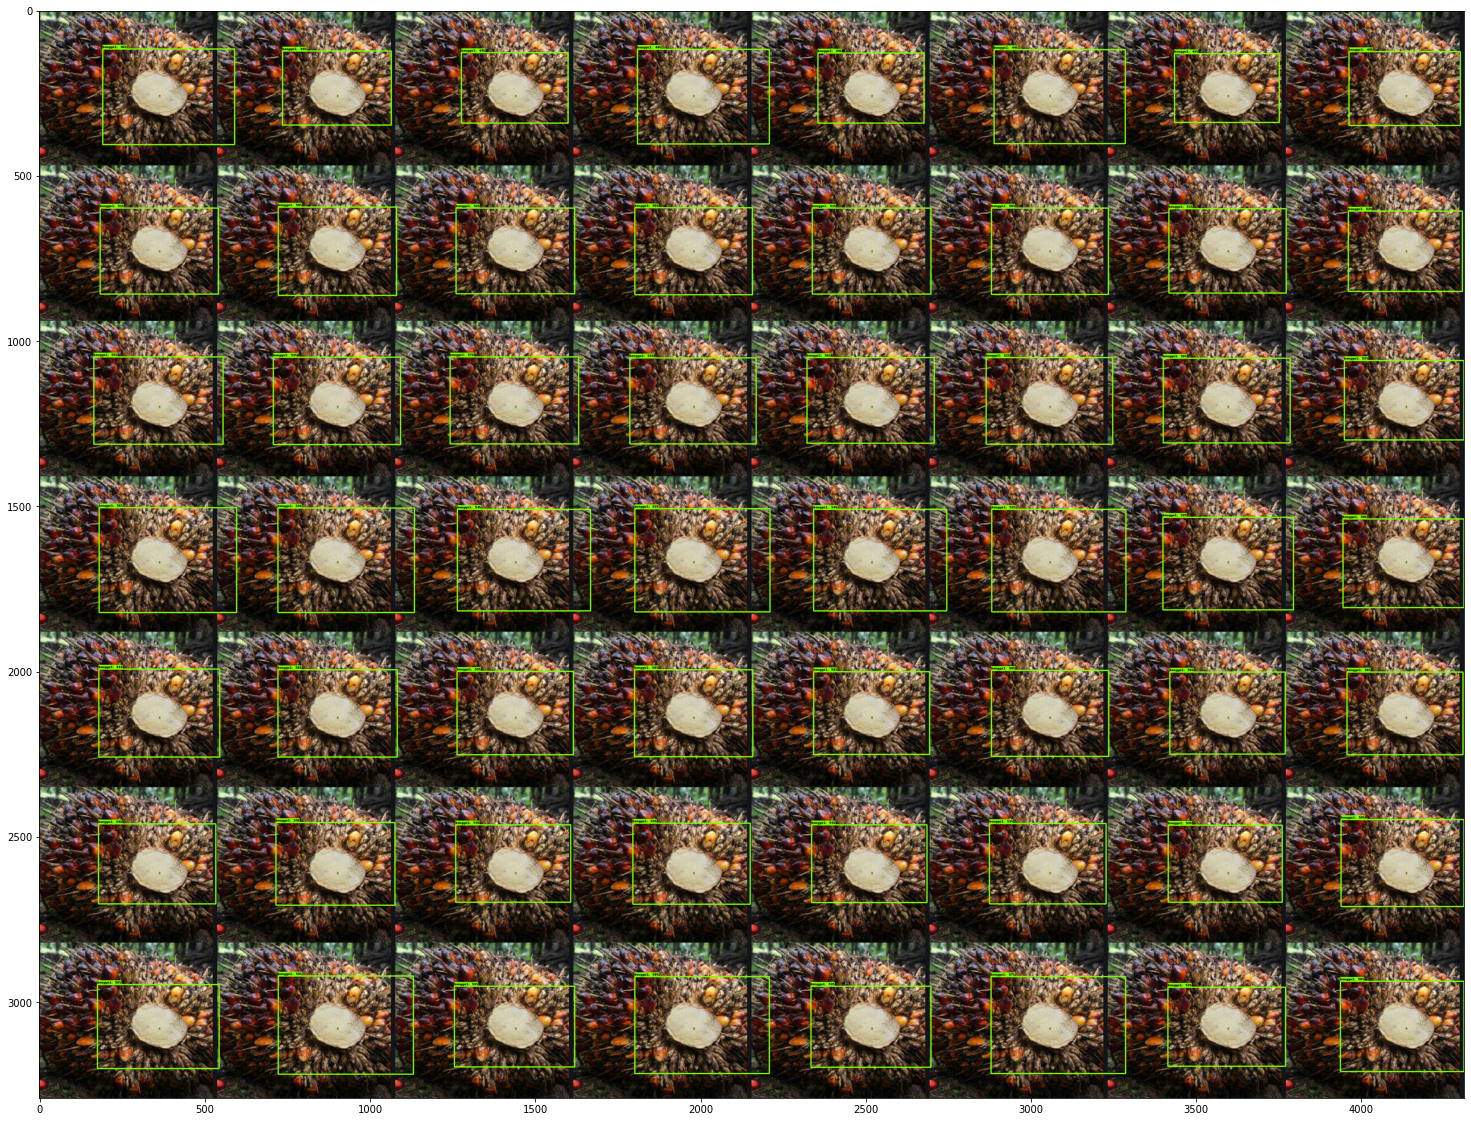

In [ ]:
%matplotlib inline

model_path = 'workspace/training_first/exported-models/model_CenterNet_1/model.tflite'
label_map_path = 'workspace/training_first/annotations/label_map.pbtxt'

image_path = 'sawit_banyak.jpg'

# Initialize TensorFlow Lite Interpreter.
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Label map can be used to figure out what class ID maps to what
# label. `label_map.txt` is human-readable.
category_index = label_map_util.create_category_index_from_labelmap(label_map_path)

label_id_offset = 1

image = tf.io.read_file(image_path)
image = tf.compat.v1.image.decode_jpeg(image)
image = tf.expand_dims(image, axis=0)
image_numpy = image.numpy()

input_tensor = tf.convert_to_tensor(image_numpy, dtype=tf.float32)
# Note that CenterNet doesn't require any pre-processing except resizing to the
# input size that the TensorFlow Lite Interpreter was generated with.
input_tensor = tf.image.resize(input_tensor, (320, 320))
boxes, classes, scores, num_detections = detect(interpreter, input_tensor)
print(boxes, classes, scores, num_detections)

vis_image = plot_detections(
    image_numpy[0],
    boxes[0],
    classes[0].astype(np.uint32) + label_id_offset,
    scores[0],
    category_index)
plt.figure(figsize = (30, 20))
plt.imshow(vis_image)

## Proses konversi ke TFLite dengan metadata 
* proses sebelumnya tidak ada error? selamaat
* kita bikin metadata nya

In [ ]:
from tflite_support.metadata_writers import object_detector
from tflite_support.metadata_writers import writer_utils

ObjectDetectorWriter = object_detector.MetadataWriter

# Cek folder ini jangan lupa gan/sis

_MODEL_PATH = "workspace/training_first/exported-models/model_CenterNet_1/model.tflite"
_SAVE_TO_PATH = "workspace/training_first/exported-models/model_CenterNet_1/model_with_metadata.tflite"
_LABEL_PATH = "workspace/training_first/exported-models/model_CenterNet_1/tflite_label_map.txt"

# We need to convert Detection API's labelmap into what the Task API needs:
# a txt file with one class name on each line from index 0 to N.
# The first '0' class indicates the background.
# This code assumes COCO detection which has 90 classes, you can write a label
# map file for your model if re-trained.
od_label_map_path = 'workspace/training_first/annotations/label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(
    label_map_path)
f = open(_LABEL_PATH, 'w')
for class_id in range(1, 91):
  if class_id not in category_index:
    f.write('???\n')
    continue
  name = category_index[class_id]['name']
  f.write(name+'\n')
f.close()

writer = ObjectDetectorWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), input_norm_mean=[0], 
    input_norm_std=[1], label_file_paths=[_LABEL_PATH])
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)

In [ ]:
from tflite_support import metadata

displayer = metadata.MetadataDisplayer.with_model_file(_SAVE_TO_PATH)
print("Metadata populated:")
print(displayer.get_metadata_json())
print("=============================")
print("Associated file(s) populated:")
print(displayer.get_packed_associated_file_list())

Metadata populated:
{
  "name": "ObjectDetector",
  "description": "Identify which of a known set of objects might be present and provide information about their positions within the given image or a video stream.",
  "subgraph_metadata": [
    {
      "input_tensor_metadata": [
        {
          "name": "image",
          "description": "Input image to be detected.",
          "content": {
            "content_properties_type": "ImageProperties",
            "content_properties": {
              "color_space": "RGB"
            }
          },
          "process_units": [
            {
              "options_type": "NormalizationOptions",
              "options": {
                "mean": [
                  0.0
                ],
                "std": [
                  1.0
                ]
              }
            }
          ],
          "stats": {
            "max": [
              255.0
            ],
            "min": [
              0.0
            ]
          }
       